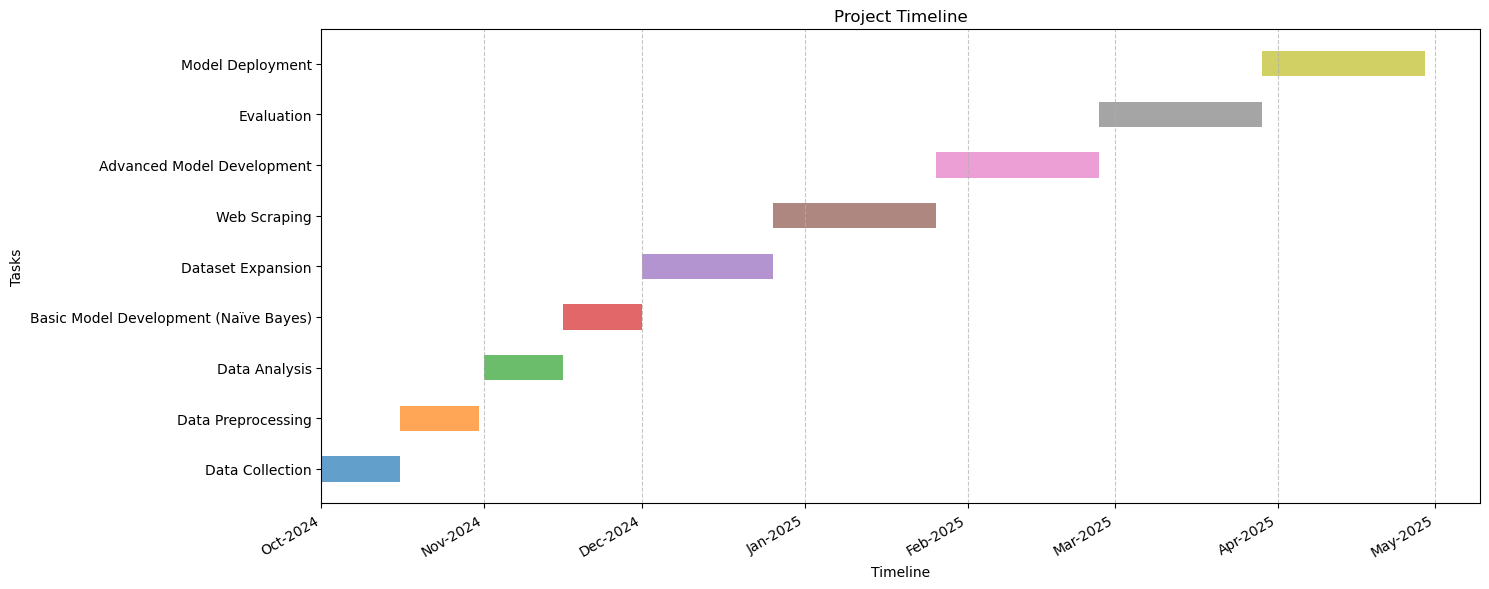

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime, timedelta

# Define tasks with start dates and durations
tasks_data = [
    {"Task": "Data Collection", "Start": "2024-10-01", "Duration": 15},
    {"Task": "Data Preprocessing", "Start": "2024-10-16", "Duration": 15},
    {"Task": "Data Analysis", "Start": "2024-11-01", "Duration": 15},
    {"Task": "Basic Model Development (Naïve Bayes)", "Start": "2024-11-16", "Duration": 15},
    {"Task": "Dataset Expansion", "Start": "2024-12-01", "Duration": 25},
    {"Task": "Web Scraping", "Start": "2024-12-26", "Duration": 31},
    {"Task": "Advanced Model Development", "Start": "2025-01-26", "Duration": 31},
    {"Task": "Evaluation", "Start": "2025-02-26", "Duration": 31},
    {"Task": "Model Deployment", "Start": "2025-03-29", "Duration": 31}
]

# Convert to DataFrame
df = pd.DataFrame(tasks_data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = df['Start'] + pd.to_timedelta(df['Duration'], unit='D')

# Plotting
plt.figure(figsize=(15, 6))
plt.title("Project Timeline")
plt.xlabel("Timeline")
plt.ylabel("Tasks")

for i, task in enumerate(df.itertuples()):
    plt.barh(task.Task, (task.End - task.Start).days, 
             left=task.Start, 
             height=0.5, 
             alpha=0.7)

# Use correct date locators and formatters
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gcf().autofmt_xdate()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

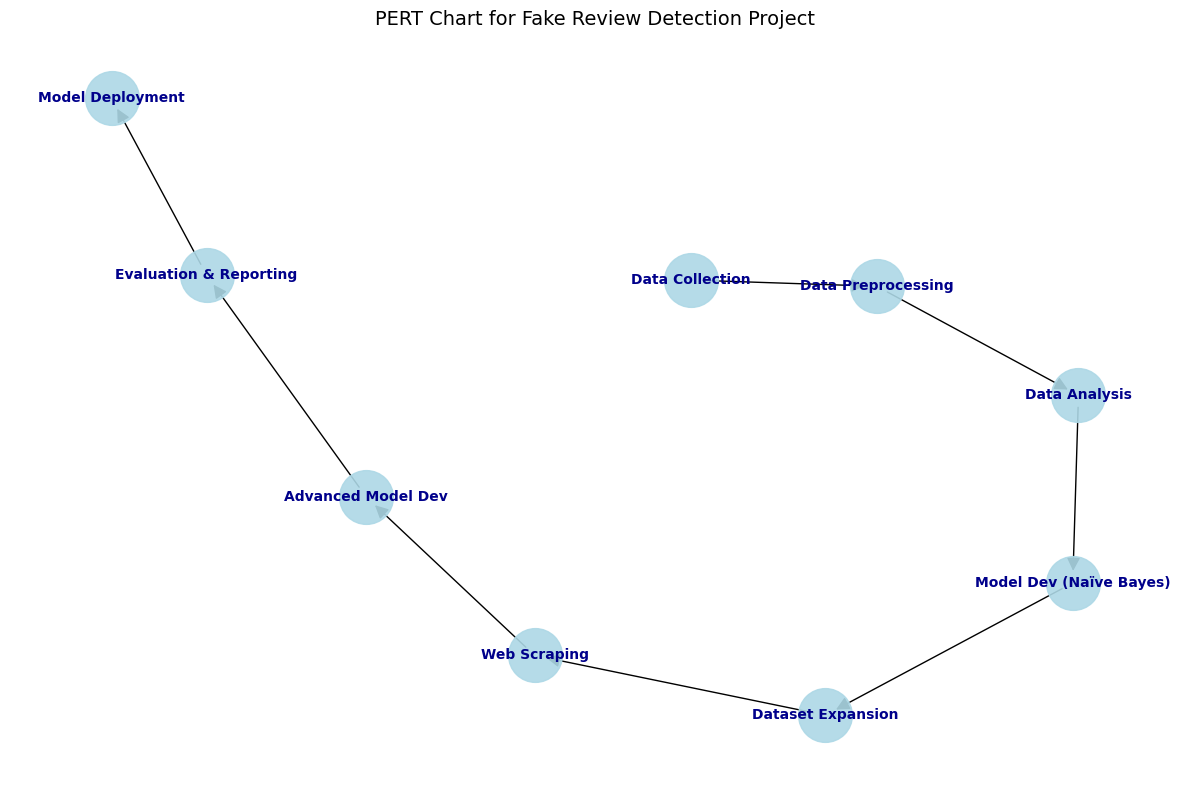

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Define tasks and their dependencies
tasks = {
    "Data Collection": [],
    "Data Preprocessing": ["Data Collection"],
    "Data Analysis": ["Data Preprocessing"],
    "Model Dev (Naïve Bayes)": ["Data Analysis"],
    "Dataset Expansion": ["Model Dev (Naïve Bayes)"],
    "Web Scraping": ["Dataset Expansion"],
    "Advanced Model Dev": ["Web Scraping"],
    "Evaluation & Reporting": ["Advanced Model Dev"],
    "Model Deployment": ["Evaluation & Reporting"]
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on dependencies
for task, dependencies in tasks.items():
    G.add_node(task)
    for dependency in dependencies:
        G.add_edge(dependency, task)

# Plot the PERT chart
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes for better visualization
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="lightblue", alpha=0.9)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=20, edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="darkblue", font_weight="bold")

# Add title and remove axes
plt.title("PERT Chart for Fake Review Detection Project", fontsize=14)
plt.axis("off")
plt.tight_layout()

plt.show()


In [59]:
from graphviz import Source

pert_chart = '''
graph TD
    A[Data Collection\n Oct 2024] --> B[Data Preprocessing\n Oct-Nov 2024]
    B --> C[Data Analysis\n Nov-Dec 2024]
    C --> D[Model Dev Naïve Bayes\n Dec 2024-Jan 2025]
    
    subgraph Parallel Activities
        E[Dataset Expansion\n Dec 2024-Jan 2025]
        F[Web Scraping\n Jan-Feb 2025]
    end
    
    D --> E
    D --> F
    
    E --> G[Advanced Model Dev\n Feb-Mar 2025]
    F --> G
    
    subgraph Final Stages
        H[Evaluation\n Mar-Apr 2025]
        I[Model Deployment\n Apr-May 2025]
    end
    
    G --> H
    G --> I
    
    H --> J[Project Completion\n May 2025]
    I --> J
'''

# Render the chart
Source(pert_chart, format='png').render('pert_chart', view=True)

ModuleNotFoundError: No module named 'graphviz'